In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy import ndimage as ndi
import math
from skimage import (
    exposure, io, filters
)
from scipy import signal

In [2]:
data = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_G2_Fully_cyclinB1_20minrelease_H3S10_1-03-01.czi #1.tif_registered.tif")
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
print("range: ({}, {})".format(data.min(), data.max()))

shape: (57, 740, 740, 4)
dtype: uint16
range: (0, 7699)


In [3]:
#Channel 3: f-ara-EdU (green),
data_edu = data[:,:,:,2]
#Channel 4 – DNA(Hoechst) (magenta)
data_hoechst = data[:,:,:,3]

The next line should fail! Explain why!

TypeError: Invalid shape (57, 740, 740) for image data

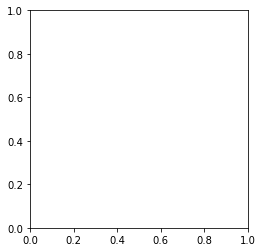

In [4]:
plt.imshow(data_edu)
#The imshow object doesn't know how to deal with a stack of images, only individual slices

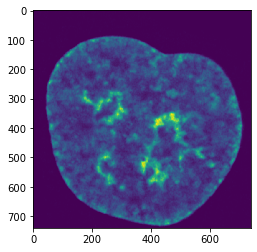

In [8]:
plt.imshow(data_edu[27,:,:])

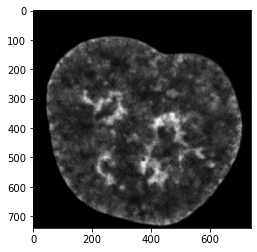

In [9]:
plt.imshow(data_edu[27,:,:],cmap="gray")

In [10]:
def display(im3d, cmap="gray",step=1, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    stack_size = im3d.shape[0]
    cols = 5
    rows = math.ceil((stack_size/cols))
    
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin = im3d.min()
    vmax = im3d.max()
    enum = 0
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
        ax.set_xticks([])
        ax.set_yticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')

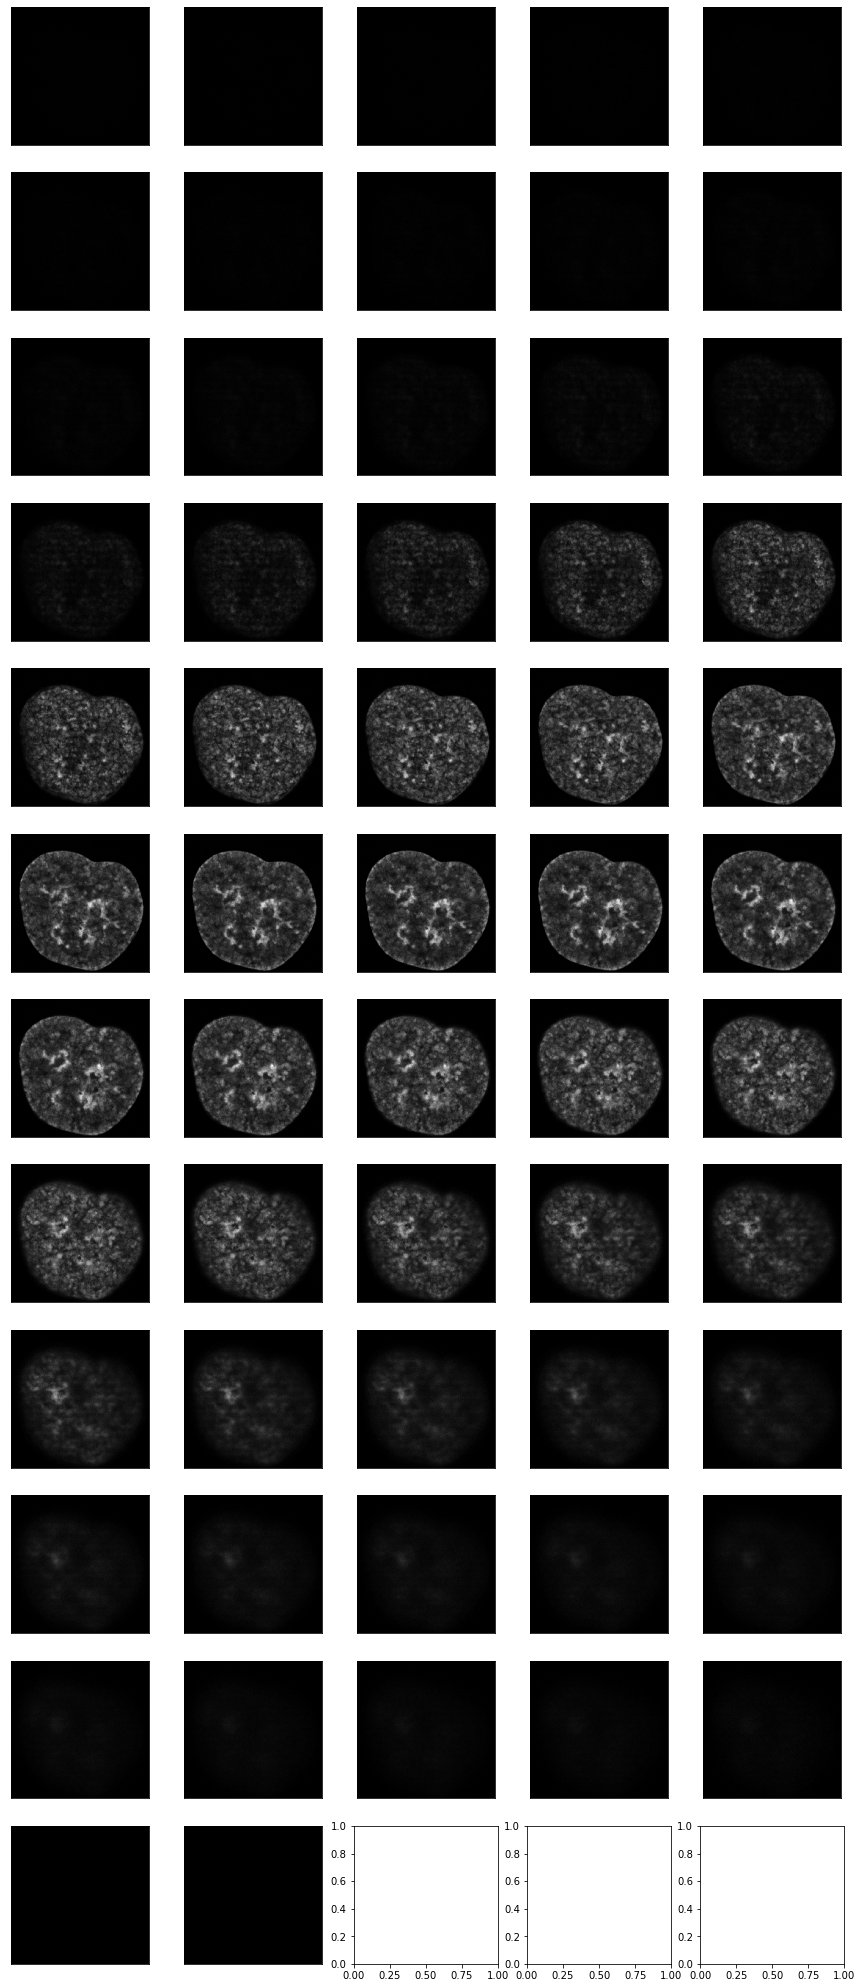

In [11]:
display(data_edu)

In [122]:
def display_hoechst_edu(im3d1, im3d2,step=3, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    stack_size = im3d1.shape[0]

    cols = 4
    rows = math.ceil((stack_size/cols)//3)
    im3d = data
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin1 = im3d1.min()
    vmax1 = im3d1.max()
    enum = 0
    for ax, image in zip(axes.flatten(), im3d1[::step]):
        ax.imshow(image, cmap="Reds", vmin=vmin1, vmax=vmax1)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
                ax.set_xticks([])
        enum += 1
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows))
    enum = 0
    vmin2 = im3d2.min()
    vmax2 = im3d2.max()
    for ax, image in zip(axes.flatten(), im3d2[::step]):
        ax.imshow(image, cmap="Greens", vmin=vmin2, vmax=vmax2)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
                ax.set_xticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')


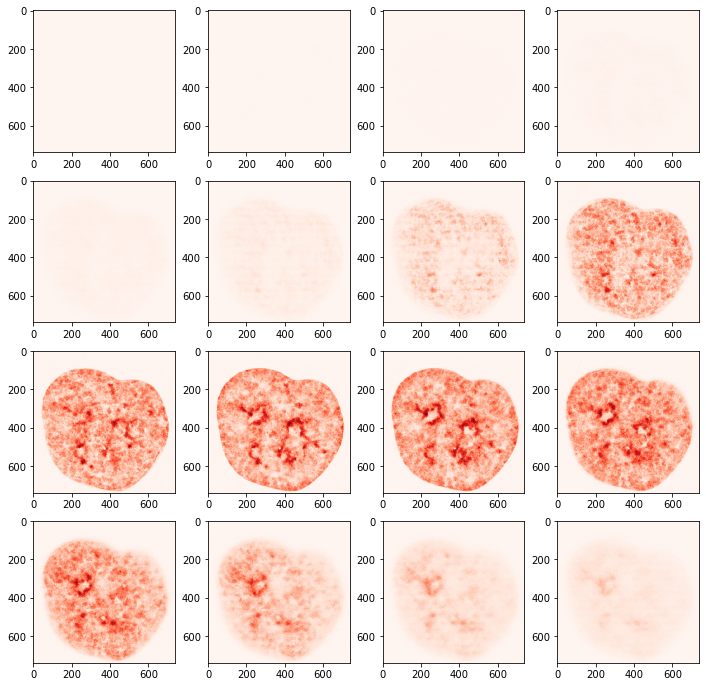

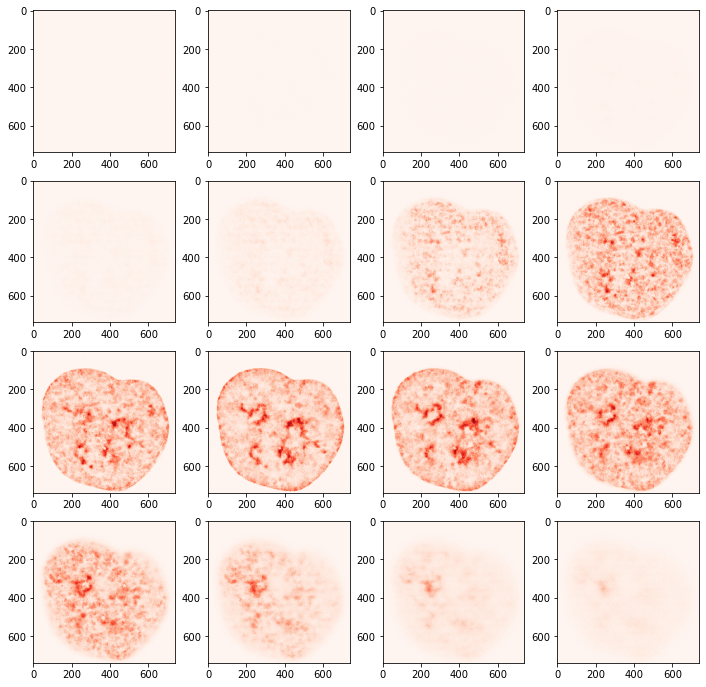

In [123]:
display_hoechst_edu(data_hoechst, data_edu)

# HW Task 1:
Write a new display function:
- That has 4 columns with the corresponding hoechst and edu channels next to each other (hoechst1, edu1, hoechst2, edu2)
- Display one in red and one in green to make the channels more obvious
- Only display every 3rd image in the stack
- A second function that has 6 columns and displays the difference between the two channels in the 3rd and 6th column
- Use an appropriate color map
- Bonus: Works with an uneven number of images. 

In [ ]:
hist=[]
for i in range(57):
    hist.append(data_edu[i,:,:].mean())
plt.plot(range(57),hist,'.-')
#user selected slices
plt.vlines([27,28,29],0,max(hist))

In [ ]:
data2 = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_Hemi_cyclinB1_H3S10_1_20_min_release_nodrug-67.czi #5.tif_registered.tif")
data2_edu = data2[:,:,:,2]
print("shape: {}".format(data2.shape))
print("dtype: {}".format(data2.dtype))
print("range: ({}, {})".format(data2.min(), data2.max()))

In [ ]:
hist = []
for i in range(len(data2_edu)):
    hist.append(data2_edu[i,:,:].mean())
plt.plot(range(len(data2_edu)),hist,'.-')
#user selected slices
plt.vlines([53,54,55],0,max(hist))

In [ ]:
#for data2_edu
#this will work if the slices you want are the slices with the highest mean intensity and the ones either side. 
# doesn't work for data_edu as there are two higher peaks either side of the slices chosen manually.

# we are choosing the slices based on the edu channel, if we were choosing based on the hoechst channel then maybe this double peak 
# wouldn't be there.
hist = []
for i in range(len(data2_edu)):
    hist.append(data2_edu[i,:,:].mean())
plt.plot(range(len(data2_edu)),hist,'.-')
#user selected slices, without hard coding anything
maxslice= signal.find_peaks(hist,max(hist))
chosen = []
max_value = None
max_idx = None

for idx, num in enumerate(hist):
    if (max_value is None or num > max_value):
        max_value = num
        max_idx = idx
        
#chosen = hist[max_idx], hist[max_idx-1], hist[max_idx+1]
for i in range(len(data2_edu)):
    if hist[i] == hist[max_idx]:
        chosen.append(i)
    elif hist[i] == hist[max_idx-1]:
        chosen.append(i)
    elif hist[i] == hist[max_idx+1]:
        chosen.append(i)

    plt.vlines(chosen,0,max(hist))

In [ ]:
#for data_edu
hist = []
for i in range(len(data_edu)):
    hist.append(data_edu[i,:,:].mean())
plt.plot(range(len(data_edu)),hist,'.-')
#user selected slices, without hard coding anything
maxslice= signal.find_peaks(hist,max(hist))
chosen = []
max_value = None
max_idx = None

for idx, num in enumerate(hist):
    if (max_value is None or num > max_value):
        max_value = num
        max_idx = idx
        
#chosen = hist[max_idx], hist[max_idx-1], hist[max_idx+1]
for i in range(len(data_edu)):
    if hist[i] == hist[max_idx]:
        chosen.append(i)
    elif hist[i] == hist[max_idx-1]:
        chosen.append(i)
    elif hist[i] == hist[max_idx+1]:
        chosen.append(i)

    plt.vlines(chosen,0,max(hist))

## HW Task2:
- Imitate the user choice above. He wants the central 3 sections of a cell.
- Write a function that automatically chooses slices close to the selection above. (Do not hard code anything asume it should work on any new image.)
- Use the histogram above for the selection.
- Start with data2_edu, then try it for the data_edu

In [ ]:
display(data2_edu, chosen = [53,54,55])

In [ ]:
display(data2_edu, chosen = chosen)

In [ ]:
display(data_edu, chosen = [27,28,29])

In [ ]:
display(data_edu, chosen = chosen)

In [ ]:
# The input image.
image = data_edu[27,:,:]

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [ ]:
tresh = filters.threshold_li(image)
binary_mask = image > tresh

In [ ]:
tresh

In [ ]:
binary_mask

In [ ]:
plt.imshow(binary_mask)

In [ ]:
filters.try_all_threshold(image)

In [ ]:
display(data2_edu)

In [ ]:
plt.imshow(data2_edu[42,:,:], cmap='gray')

In [ ]:
image2 = data2_edu[42,:,:] 

In [ ]:
filters.try_all_threshold(image2)

In [ ]:
image = image2
result_1 = filters.unsharp_mask(image, radius=1, amount=1)
result_2 = filters.unsharp_mask(image, radius=5, amount=2)
result_3 = filters.unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## Noise

## HW Task 3:
Show how the noise affects your segmentation:
- Try both images used so far.
- Try Different levels of noise.
- Try Denoising or blurring.
- Explain your method of choice



Example denoising methods:
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html#sphx-glr-auto-examples-filters-plot-restoration-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html#sphx-glr-auto-examples-filters-plot-unsharp-mask-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html#sphx-glr-auto-examples-filters-plot-denoise-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_dog.html#sphx-glr-auto-examples-filters-plot-dog-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant.html#sphx-glr-auto-examples-filters-plot-j-invariant-py



In [ ]:
print("range: ({}, {})".format(data2.min(), data2.max()))

One way to generate noise:

In [16]:
noise_mask = np.full((740, 740), 28, dtype=np.uint16)
noise_mask[320:-320, 320:-320] = 300

noise = 0.1*((noise_mask * np.random.random(noise_mask.shape) - 0.2 *
         noise_mask).astype(np.uint16))

In [17]:
noise

array([[1.0000e+00, 9.0000e-01, 1.1000e+00, ..., 6.5531e+03, 0.0000e+00,
        1.6000e+00],
       [1.3000e+00, 6.5533e+03, 2.0000e+00, ..., 9.0000e-01, 1.6000e+00,
        4.0000e-01],
       [1.4000e+00, 4.0000e-01, 6.5534e+03, ..., 1.7000e+00, 2.0000e+00,
        2.1000e+00],
       ...,
       [1.4000e+00, 1.2000e+00, 6.5531e+03, ..., 2.2000e+00, 2.0000e-01,
        6.5532e+03],
       [1.5000e+00, 7.0000e-01, 3.0000e-01, ..., 1.7000e+00, 0.0000e+00,
        2.1000e+00],
       [1.9000e+00, 6.5533e+03, 1.5000e+00, ..., 6.0000e-01, 1.9000e+00,
        2.0000e+00]])

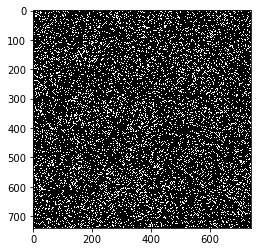

In [18]:
plt.imshow(noise, cmap='gray')

In [19]:
plt.imshow(image, cmap='gray')

NameError: name 'image' is not defined

In [20]:
plt.imshow(image+noise, cmap='gray')

NameError: name 'image' is not defined

Another way to generate noise:

In [21]:
from skimage.util import random_noise

In [22]:
sigma = 0.02
noisy = random_noise(image, var=sigma**2)

NameError: name 'image' is not defined

In [23]:
plt.imshow(noisy, cmap='gray')

NameError: name 'noisy' is not defined

## HW Task4:
Find an image of your experiments and:
- Segment it.
- Look at the effect of denoising
- Look at the effect of removing background
    - https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_regional_maxima.html#sphx-glr-auto-examples-color-exposure-plot-regional-maxima-py


## HW Task5:
Play with errosion and dilation to:
- fill holes in the mask
- create a halo around your images

Play with the expand_labels functionality.
- show how it differs
- explain it

Works only in skimage > 0.19.0.dev0:

In [46]:
from skimage import segmentation
plt.imshow(segmentation.expand_labels(binary_mask))

# Part3: Simple Object detection (Find extrema, enumerate roi's)
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_tophat.html#sphx-glr-auto-examples-filters-plot-tophat-py
- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_extrema.html#sphx-glr-auto-examples-segmentation-plot-extrema-py
- https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html#sphx-glr-auto-examples-segmentation-plot-peak-local-max-py

# Part4: Image Registration:
- https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_translation.html#sphx-glr-auto-examples-registration-plot-register-translation-py